<a href="https://colab.research.google.com/github/clepaula/farol-sentimental/blob/main/Farol_Sentimental_Analise_de_dados_PFCtba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import re
import pandas as pd
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
pip install vaderSentiment

In [ ]:
import requests
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#**Twiteer**

In [ ]:
import sys
import tweepy
import csv
import numpy as np

In [ ]:
consumer_key=''
consumer_secret=''
access_token =''
access_token_secret=''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
tweets = api.user_timeline('@Curitiba_PMC', count=10, tweet_mode='extended')
for t in tweets:
    print(t.full_text)
    print()

Boa noite, Curitiba!
📸: @alexandre_rl
#curitilover #curtacuritiba https://t.co/12rHybqHOK

➡️ Confira os números sorteados no Nota Curitibana https://t.co/8cb5YiOhhJ

#ValeDoPinhão
🚀 2º Pitch Live tem inscrições prorrogadas até quinta-feira  (10/12) https://t.co/arQwqIGIhm

#NatalDeCuritiba
🎄 Natal drive-thru do Náutico e ópera drive-in no Madalosso estreiam esta semana. Confira a programação: https://t.co/xA9dybXcVn

Curitiba registrou, nesta terça-feira (8/12), 1.114 novos casos de covid-19 e 11 óbitos de moradores da cidade infectados pelo coronavírus, conforme boletim da Secretaria Municipal da Saúde. Nove desses óbitos ocorreram nas últimas 48 horas. Saiba mais: https://t.co/qJE9vPHiSq https://t.co/oLoE9HVam9

💃 Mostra Solar de dança começa nesta terça-feira (8/12) https://t.co/fcn1agwgIv https://t.co/kLo7ISXWfx

O prazo de adesão vai até 29 de janeiro. 
Todo processo é feito pela internet! Pelo site você pode fazer simulações de pagamento e ainda emitir o Documento de Arrecadação

##**Criando uma lista de Tweets**

In [ ]:
user_id = 'Curitiba_PMC' 
count=200

In [ ]:
def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

In [ ]:
tw_ctba = list_tweets(user_id, count)

In [ ]:
tw_ctba

['Boa noite, Curitiba!\n📸: @alexandre_rl\n#curitilover #curtacuritiba https://t.co/12rHybqHOK',
 '➡️ Confira os números sorteados no Nota Curitibana https://t.co/8cb5YiOhhJ',
 '#ValeDoPinhão\n🚀 2º Pitch Live tem inscrições prorrogadas até quinta-feira  (10/12) https://t.co/arQwqIGIhm',
 '#NatalDeCuritiba\n🎄 Natal drive-thru do Náutico e ópera drive-in no Madalosso estreiam esta semana. Confira a programação: https://t.co/xA9dybXcVn',
 'Curitiba registrou, nesta terça-feira (8/12), 1.114 novos casos de covid-19 e 11 óbitos de moradores da cidade infectados pelo coronavírus, conforme boletim da Secretaria Municipal da Saúde. Nove desses óbitos ocorreram nas últimas 48 horas. Saiba mais: https://t.co/qJE9vPHiSq https://t.co/oLoE9HVam9',
 '💃 Mostra Solar de dança começa nesta terça-feira (8/12) https://t.co/fcn1agwgIv https://t.co/kLo7ISXWfx',
 'O prazo de adesão vai até 29 de janeiro. \nTodo processo é feito pela internet! Pelo site você pode fazer simulações de pagamento e ainda emitir o

In [ ]:
type(tw_ctba)

list

In [ ]:
tw_ctba[2]

'#ValeDoPinhão\n🚀 2º Pitch Live tem inscrições prorrogadas até quinta-feira  (10/12) https://t.co/arQwqIGIhm'

## **Limpando o dataset**

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

In [ ]:
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")

    return lst

In [ ]:
tw_ctba = clean_tweets(tw_ctba)

**Analisando o sentimento do tweets**

In [ ]:
sentiment_analyzer_scores(tw_ctba[2])

0

In [ ]:
def pt_tweets(lst, title='Tweets Sentiment', pt=True ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, pt)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


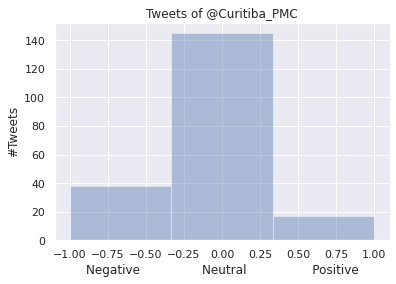

In [ ]:
tw_ctba_sent = pt_tweets(tw_ctba, user_id)

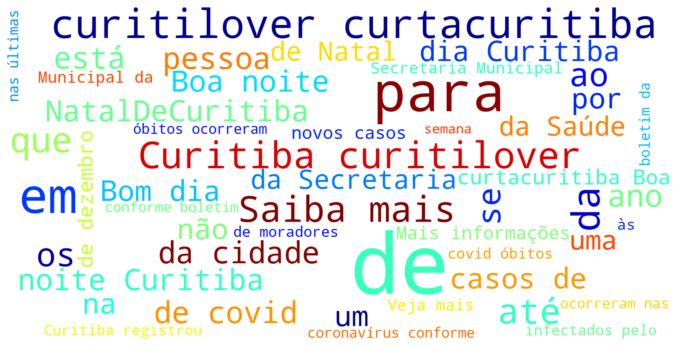

In [ ]:
word_cloud(tw_ctba)

In [ ]:
def twitter_stream_listener(file_name,
                            filter_track,
                            follow=None,
                            locations=None,
                            languages=None,
                            time_limit=20):
    class CustomStreamListener(tweepy.StreamListener):
        def __init__(self, time_limit):
            self.start_time = time.time()
            self.limit = time_limit
            # self.saveFile = open('abcd.json', 'a')
            super(CustomStreamListener, self).__init__()

        def on_status(self, status):
            if (time.time() - self.start_time) < self.limit:
                print(".", end="")
                # Writing status data
                with open(file_name, 'a') as f:
                    writer = csv.writer(f)
                    writer.writerow([
                        status.author.screen_name, status.created_at,
                        status.text
                    ])
            else:
                print("\n\n[INFO] Closing file and ending streaming")
                return False

        def on_error(self, status_code):
            if status_code == 420:
                print('Encountered error code 420. Disconnecting the stream')
                # returning False in on_data disconnects the stream
                return False
            else:
                print('Encountered error with status code: {}'.format(
                    status_code))
                return True  # Don't kill the stream

        def on_timeout(self):
            print('Timeout...')
            return True  # Don't kill the stream

    # Writing csv titles
    print(
        '\n[INFO] Open file: [{}] and starting {} seconds of streaming for {}\n'
        .format(file_name, time_limit, filter_track))
    with open(file_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['author', 'date', 'text'])

    streamingAPI = tweepy.streaming.Stream(
        auth, CustomStreamListener(time_limit=time_limit))
    streamingAPI.filter(
        track=filter_track,
        follow=follow,
        locations=locations,
        languages=languages,
    )
    f.close()

In [ ]:
filter_track = ['curitiba', 'ctba', 'cwb']
file_name = 'tweets_cwb.csv'
twitter_stream_listener (file_name, filter_track, time_limit=300)


[INFO] Open file: [tweets_cwb.csv] and starting 300 seconds of streaming for ['curitiba', 'ctba', 'cwb']

.......................................................

[INFO] Closing file and ending streaming


## **Convertendo o arquivo csv em dataframe limpo**

In [ ]:
file_name = 'tweets_cwb.csv'
df_tws = pd.read_csv(file_name)
df_tws.shape

(55, 3)

In [ ]:
df_tws.head()

,author,date,text
0,Fernand60154375,2020-12-09 01:16:20,RT @tarcisiogdf: Grande dia! Mais boa notícia....
1,celiaregbar,2020-12-09 01:16:30,RT @tarcisiogdf: Grande dia! Mais boa notícia....
2,lira_vvvv,2020-12-09 01:16:30,Morar em Curitiba\nAs cores de Curitiba.\nFoto...
3,marques11347574,2020-12-09 01:16:40,RT @tarcisiogdf: Grande dia! Mais boa notícia....
4,rjarilho,2020-12-09 01:16:43,RT @rollo_real: **** O homem asfaltou o COVID ...


In [ ]:
df_tws['text'] =  clean_tweets(df_tws['text'])

Criando uma nova coluna com o score do sentimento

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


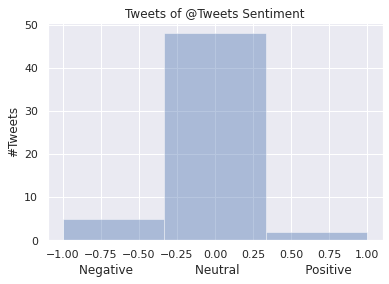

In [ ]:
df_tws['sent'] = pt_tweets(df_tws.text)

In [ ]:
df_tws.head()

,author,date,text,sent
0,Fernand60154375,2020-12-09 01:16:20,Grande dia! Mais boa notícia. acaba de liber...,0
1,celiaregbar,2020-12-09 01:16:30,Grande dia! Mais boa notícia. acaba de liber...,0
2,lira_vvvv,2020-12-09 01:16:30,Morar em Curitiba\nAs cores de Curitiba.\nFoto:,0
3,marques11347574,2020-12-09 01:16:40,Grande dia! Mais boa notícia. acaba de liber...,0
4,rjarilho,2020-12-09 01:16:43,**** O homem asfaltou o COVID e vai privatiza...,0


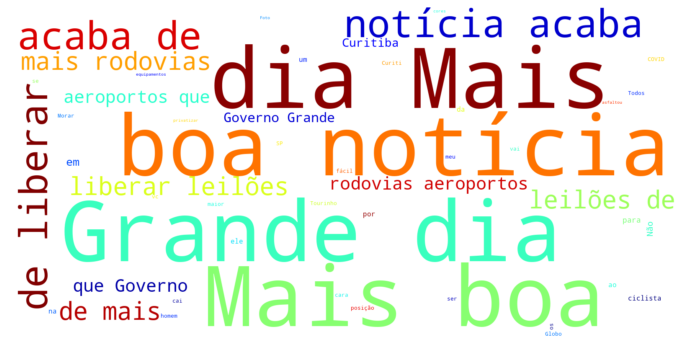

In [ ]:
word_cloud(df_tws.text)

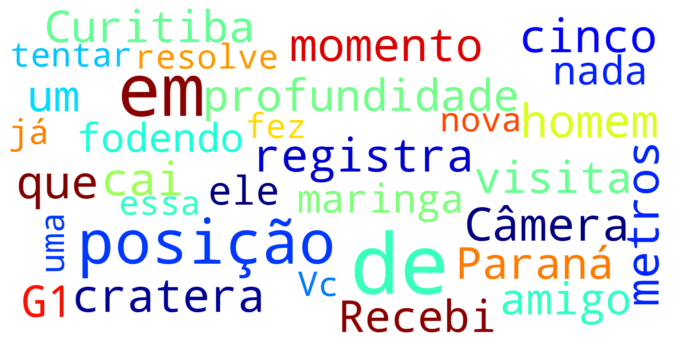

In [ ]:
# Words in positive tweets
tws_pos = df_tws['text'][df_tws['sent'] == 1]
word_cloud(tws_pos)

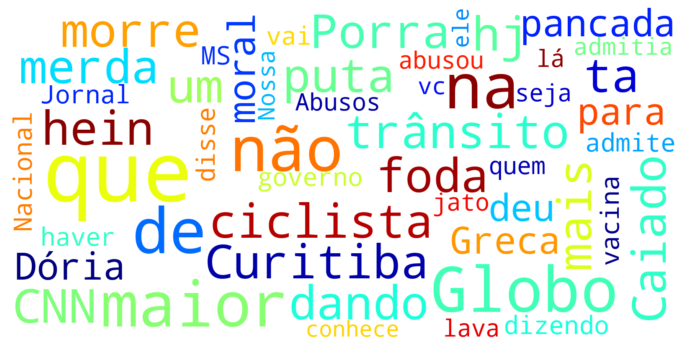

In [ ]:
# Words in negative tweets
tws_pos = df_tws['text'][df_tws['sent'] == -1]
word_cloud(tws_pos)

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extracting hashtags from positive tweets

HT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df_tws['text'][df_tws['sent'] == -1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

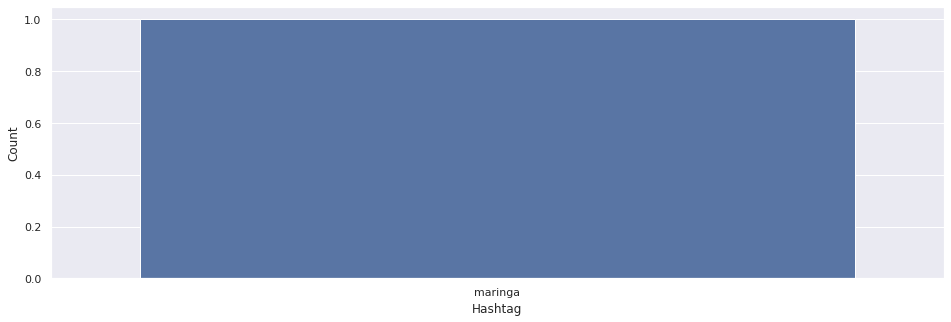

In [ ]:
# Positive Tweets

a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# Negative Tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()